In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Layer, LayerNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
datat = pd.read_csv('True.csv')
dataf = pd.read_csv('Fake.csv')
print(datat.head())
print(dataf.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
                                               title  \
0   Donald Trump Sends Out Embarrassing Ne

In [3]:
datat.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
datat.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [5]:
dataf.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
dataf.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


# Domain Analysis

### Description

# Basic Check

In [11]:
datat.shape

(21417, 4)

In [12]:
dataf.shape

(23481, 4)

In [13]:
datat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [14]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [15]:
datat.describe(include=['O'])

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [16]:
dataf.describe(include=['O'])

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [17]:
datat.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [18]:
dataf.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [22]:
datat.describe(include=['O'])

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


## Combining two datasets into one dataframe

In [49]:
datat['label'] = 1
dataf['label'] = 0
data = pd.concat([datat, dataf], ignore_index=True)

In [51]:
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [53]:
data.label.unique()

array([1, 0], dtype=int64)

In [57]:
data.text.nunique()

38646

In [184]:
data.subject.unique()

array(['politicsNews', 'worldnews', 'News', 'politics', 'Government News',
       'left-news', 'US_News', 'Middle-east'], dtype=object)

In [186]:
data.subject.nunique()

8

# Exploratory Data Analysis

#### Univariate Analysis (Analyzing a single variable)

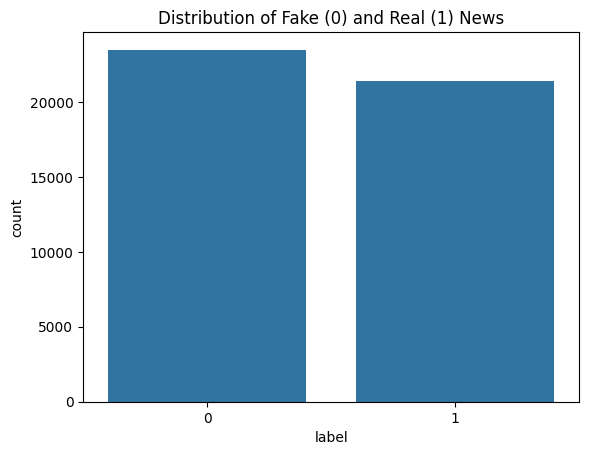

In [66]:
#This helps check if the dataset is balanced or imbalanced.

sns.countplot(x='label', data=pd.concat([datat, dataf])) 
plt.title("Distribution of Fake (0) and Real (1) News")
plt.show()


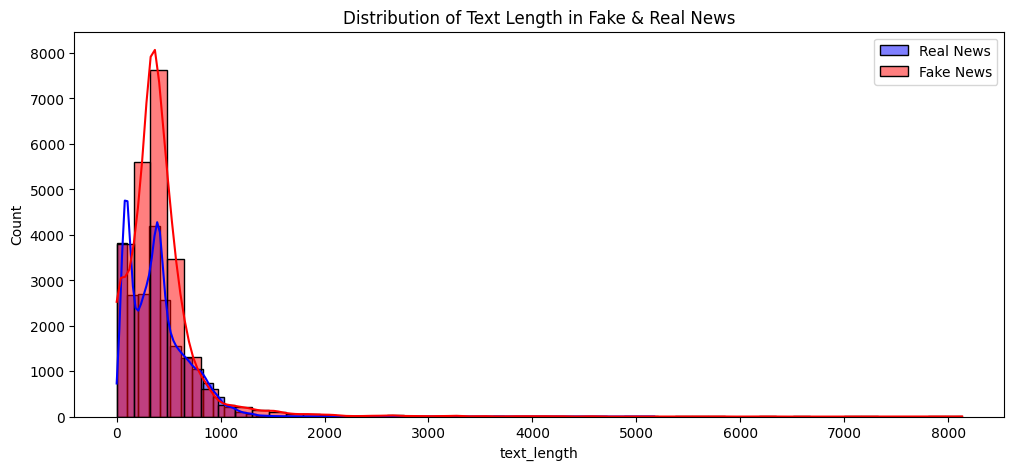

In [70]:
#This checks whether fake news articles tend to be longer or shorter than real news.

datat['text_length'] = datat['text'].apply(lambda x: len(str(x).split()))
dataf['text_length'] = dataf['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12,5))
sns.histplot(datat['text_length'], bins=50, kde=True, label="Real News",color="Blue")
sns.histplot(dataf['text_length'], bins=50, kde=True, label="Fake News", color="red")
plt.legend()
plt.title("Distribution of Text Length in Fake & Real News")
plt.show()


#### Bivariate Analysis (Relationship between two variables)

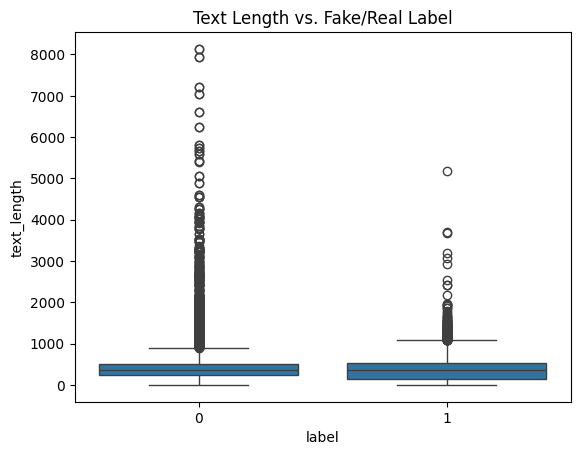

In [82]:
#Word Count vs. Label

sns.boxplot(x="label", y="text_length", data=pd.concat([datat, dataf]))
plt.title("Text Length vs. Fake/Real Label")
plt.show()


C:\Users\satya\AppData\Local\Temp\ipykernel_16296\4104547502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="label", y="text_length", data=pd.concat([datat, dataf]), palette="muted")


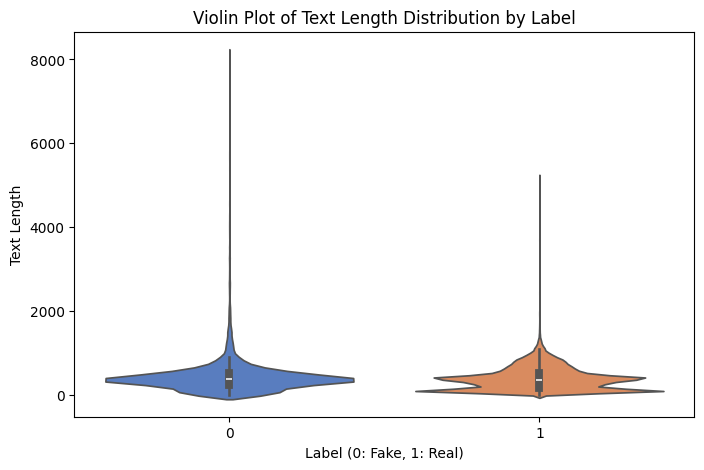

In [169]:
# This gives a more detailed distribution than a box plot
plt.figure(figsize=(8,5))
sns.violinplot(x="label", y="text_length", data=pd.concat([datat, dataf]), palette="muted")
plt.title("Violin Plot of Text Length Distribution by Label")
plt.xlabel("Label (0: Fake, 1: Real)")
plt.ylabel("Text Length")
plt.show()


In [86]:
pip install nltk


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


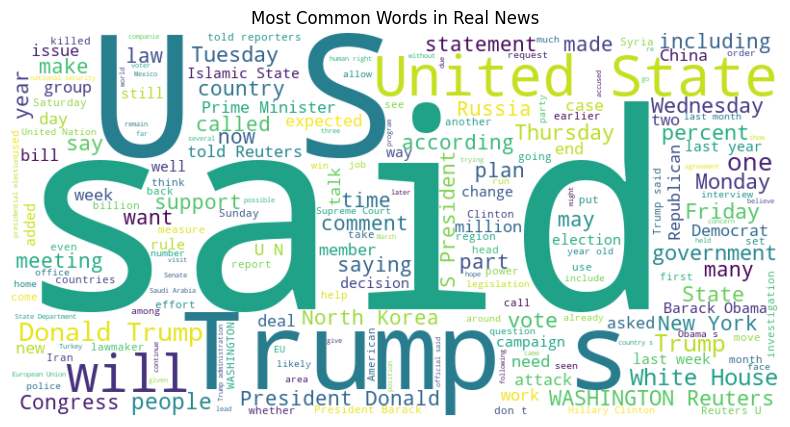

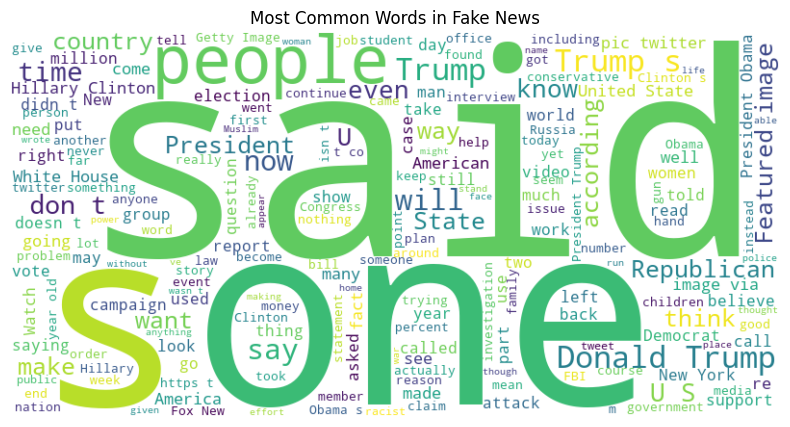

In [88]:
#This helps visualize which words are most common in fake vs. real news

from collections import Counter
import nltk
from wordcloud import WordCloud

# Function to get most common words
def get_top_n_words(corpus, n=20):
    words = " ".join(corpus).split()
    return Counter(words).most_common(n)

real_top_words = get_top_n_words(datat['text'])
fake_top_words = get_top_n_words(dataf['text'])

# WordCloud for Real News
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(datat['text']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Real News")
plt.show()

# WordCloud for Fake News
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(dataf['text']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Fake News")
plt.show()


#### Multivariate Analysis (Analyzing relationships between more than two variables)

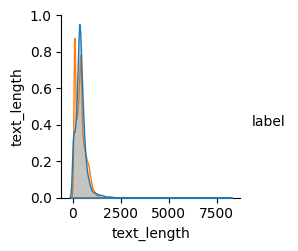

In [95]:
#This helps detect patterns and relationships between multiple variables.
df = pd.concat([datat, dataf])
sns.pairplot(df, hue="label", diag_kind="kde")

plt.show()


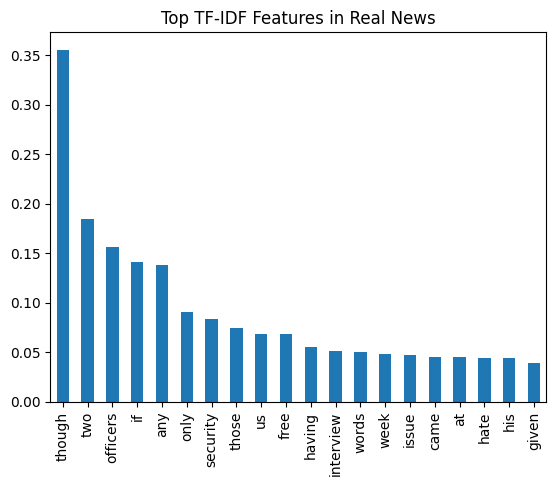

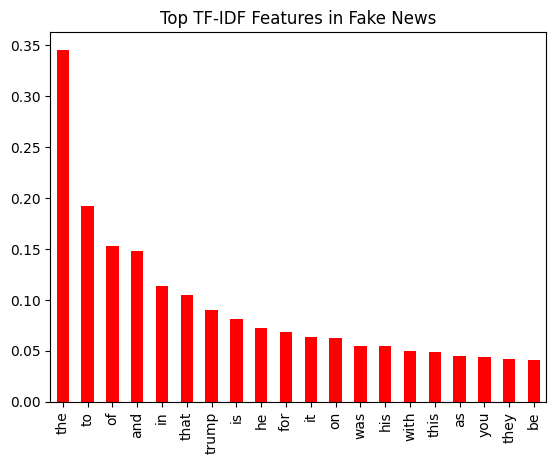

In [97]:
#This will show the most important words in real vs. fake news.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X_real = vectorizer.fit_transform(datat['text']).toarray()
X_fake = vectorizer.fit_transform(dataf['text']).toarray()

real_features = pd.DataFrame(X_real, columns=vectorizer.get_feature_names_out())
fake_features = pd.DataFrame(X_fake, columns=vectorizer.get_feature_names_out())

real_features.mean().sort_values(ascending=False)[:20].plot(kind="bar", title="Top TF-IDF Features in Real News")
plt.show()

fake_features.mean().sort_values(ascending=False)[:20].plot(kind="bar", title="Top TF-IDF Features in Fake News", color="red")
plt.show()


#### Correlation Analysis

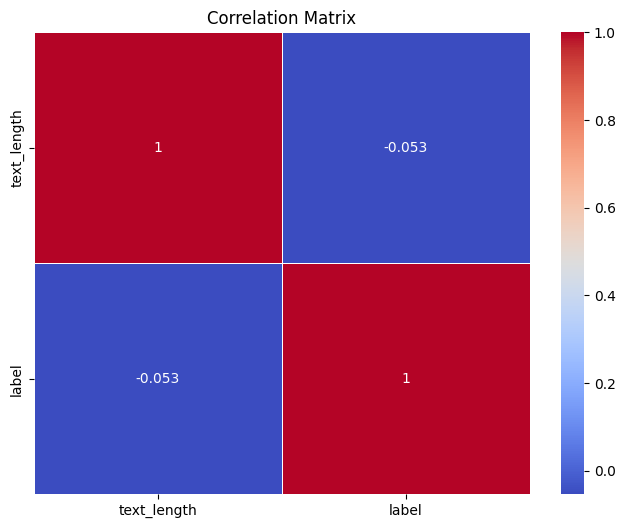

In [100]:
# This will highlight correlations between numerical features (e.g., text length vs. fake/real news).
import seaborn as sns

df = pd.concat([datat, dataf])
df_numeric = df[['text_length', 'label']]

plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



# Data Preprocessing

### First let's remove punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation:

In [104]:
# get the default list of punctuations in Python
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [108]:
import nltk
from nltk.corpus import stopwords

# Download stopwords dataset (only needed once)
nltk.download('stopwords')

# Now, define stop words
stop_words = set(stopwords.words('english'))
print(stop_words)  # Check if stopwords are loaded correctly


{'ain', "she'd", "you'll", 'that', 'this', 'by', 'aren', 'doesn', 'she', 'no', 'hasn', 'against', 'haven', 'don', 'o', "we'll", "wouldn't", 'our', 'from', 'during', "don't", 'he', 'isn', 'of', 'needn', 'about', 'themselves', 'more', 'herself', 'until', 'mustn', 'their', 'at', "haven't", 's', 'the', 'each', "we've", 'didn', 'hers', 'couldn', 'mightn', 'should', 'with', 'weren', 'after', 'so', 'here', "hadn't", 'too', 'shouldn', 'they', 'being', "wasn't", 'not', 'now', 'which', 'yourselves', 'will', 'few', 'have', 're', "shouldn't", 'you', "couldn't", 'above', "that'll", 'on', "he's", 'again', "aren't", 'him', 'below', "i'd", 'myself', 'a', 'll', 'are', "shan't", 'both', 'how', 'under', "you'd", 'having', 'hadn', 'off', "he'll", 'them', 'be', 'down', 'ma', 'won', 'yours', 'my', "it's", 'nor', 'while', 'further', 'just', "needn't", 'been', 'itself', 'in', 'as', 'own', "doesn't", 'has', 'all', "we'd", "they'll", 'some', 'such', 'very', "he'd", 'out', 'up', 'me', 'his', 'and', "didn't", 'do

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
import re

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  #removes punctuation
    text = re.sub(r'\d+', '', text)  #removes numbers
    text = text.lower()  #turns everything to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words]) #gets rid of stop words
    return text

data['text'] = data['text'].apply(clean_text) #applies changes

In [116]:
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters head conservative republica...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people allowed ...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters special counsel investigati...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",1


In [123]:
data.text.shape

(44898,)

 # Now Train and Test Data

In [127]:

#some train test splitting, 20%
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142857)

In [129]:
X_train

17749    moscow reuters russia rule ordering united sta...
10315    washington reuters south carolina governor nik...
11483    istanbulreuters turkey parliament approved gov...
20265    washington reuters white house announced tuesd...
37636                                                     
                               ...                        
26203    republican presidential nominee donald trump k...
10930    new york reuters us house committee natural re...
20925    reuters shares florida home insurers including...
18759    vancouver reuters british columbia hired inves...
8651     new york reuters republican presidential nomin...
Name: text, Length: 35918, dtype: object

In [131]:
X_test

37091                                                     
7722     las vegas reuters president barack obama sunda...
32380    someone needs educate ellen degeneres presiden...
28408    bernie sanders smacked man harlem rally saturd...
30722    pastor kenneth sharpton glasgow claims reveren...
                               ...                        
8352     washington reuters although nov us presidentia...
7463     editors note attention language paragraph may ...
35063    let door hit ya bbbut beat innocent trump supp...
14158    hague reuters former bosnian serb military lea...
39524    news forecast third quarter gdp set expand bad...
Name: text, Length: 8980, dtype: object

In [133]:
y_train

17749    1
10315    1
11483    1
20265    1
37636    0
        ..
26203    0
10930    1
20925    1
18759    1
8651     1
Name: label, Length: 35918, dtype: int64

In [135]:
y_test

37091    0
7722     1
32380    0
28408    0
30722    0
        ..
8352     1
7463     1
35063    0
14158    1
39524    0
Name: label, Length: 8980, dtype: int64

### Converting words into vectors for easier computer handling

In [138]:
#turns everything into vectors
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

 # Applying Naive Bayes Theorem

In [141]:
#This project uses the naive bayes model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train) #doe the actual data fitting

MultinomialNB()

In [143]:
X_train_vectorized

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4549606 stored elements and shape (35918, 5000)>

#### Metrics

In [146]:
predictions = model.predict(X_test_vectorized) #stores alll of the predictions into a variable
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}") #compares with actual results
print(classification_report(y_test, predictions))

Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4670
           1       0.94      0.94      0.94      4310

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

